In [ ]:
import sklearn, os
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Demo6/part-00146-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')

# Display the first few rows
print(df.head())

   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.312159      287950.75          16.78     66.55  1666.945818   
1       7.663040         110.28           6.00     64.00     0.266213   
2       0.084227       30523.00          17.00     64.00  8442.058187   
3       0.000000           0.00           1.00     64.00     5.093716   
4       0.000000          54.00           6.00     64.00    18.108917   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0  1666.945818    0.0              0.0              0.0              0.0  ...   
1     0.266213    0.0              0.0              1.0              0.0  ...   
2  8442.058187    0.0              0.0              0.0              0.0  ...   
3     5.093716    0.0              0.0              0.0              0.0  ...   
4    18.108917    0.0              0.0              0.0              0.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0  1

In [ ]:
df.shape

(227148, 47)

In [ ]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,227148.000000,2.271480e+05,227148.000000,227148.000000,2.271480e+05,2.271480e+05,2.271480e+05,227148.000000,227148.000000,227148.000000,...,227148.000000,227148.000000,227148.000000,2.271480e+05,227148.000000,227148.000000,227148.000000,2.271480e+05,227148.000000,227148.000000
mean,6.184935,7.864698e+04,9.046340,66.339412,8.804398e+03,8.804398e+03,7.327417e-07,0.086261,0.206988,0.090302,...,124.997520,33.223767,125.157547,8.315411e+07,9.497183,13.130947,46.944446,3.008508e+04,0.096720,141.479500
std,384.027335,4.699928e+05,8.902679,13.997755,9.725186e+04,9.725186e+04,1.240482e-04,0.280750,0.405148,0.286615,...,242.355675,158.242357,242.797171,1.708972e+07,0.821325,8.649971,223.795412,2.852585e+05,0.233215,21.127193
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.131552e+00,2.131552e+00,0.000000e+00,0.000000,0.000000,0.000000,...,50.000000,0.000000,50.000000,8.306855e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.594990e+01,1.594990e+01,0.000000e+00,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.312452e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.105954,2.873100e+02,14.440000,64.000000,1.173105e+02,1.173105e+02,0.000000e+00,0.000000,0.000000,0.000000,...,54.052576,0.377989,54.060000,8.334400e+07,9.500000,10.396749,0.505921,1.380211e+00,0.080000,141.550000
max,145416.172271,9.725029e+06,47.000000,255.000000,6.291456e+06,6.291456e+06,4.141447e-02,1.000000,1.000000,1.000000,...,6183.340317,5401.631925,4554.800000,1.676394e+08,13.500000,109.533120,7639.061128,3.336893e+07,1.000000,244.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227148 entries, 0 to 227147
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    227148 non-null  float64
 1   Header_Length    227148 non-null  float64
 2   Protocol Type    227148 non-null  float64
 3   Duration         227148 non-null  float64
 4   Rate             227148 non-null  float64
 5   Srate            227148 non-null  float64
 6   Drate            227148 non-null  float64
 7   fin_flag_number  227148 non-null  float64
 8   syn_flag_number  227148 non-null  float64
 9   rst_flag_number  227148 non-null  float64
 10  psh_flag_number  227148 non-null  float64
 11  ack_flag_number  227148 non-null  float64
 12  ece_flag_number  227148 non-null  float64
 13  cwr_flag_number  227148 non-null  float64
 14  ack_count        227148 non-null  float64
 15  syn_count        227148 non-null  float64
 16  fin_count        227148 non-null  floa

In [ ]:
df['label'].unique()

array(['Mirai-udpplain', 'DoS-SYN_Flood', 'DDoS-UDP_Flood',
       'DDoS-ICMP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
       'BenignTraffic', 'DoS-TCP_Flood', 'DDoS-SynonymousIP_Flood',
       'Mirai-greip_flood', 'DDoS-SYN_Flood', 'DDoS-RSTFINFlood',
       'DoS-UDP_Flood', 'DDoS-ICMP_Fragmentation',
       'DDoS-UDP_Fragmentation', 'DoS-HTTP_Flood', 'DNS_Spoofing',
       'CommandInjection', 'DDoS-ACK_Fragmentation', 'Mirai-greeth_flood',
       'Recon-HostDiscovery', 'MITM-ArpSpoofing', 'DDoS-SlowLoris',
       'VulnerabilityScan', 'Recon-OSScan', 'BrowserHijacking',
       'Recon-PortScan', 'Backdoor_Malware', 'DDoS-HTTP_Flood',
       'DictionaryBruteForce', 'XSS', 'Recon-PingSweep',
       'Uploading_Attack', 'SqlInjection'], dtype=object)

In [ ]:
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
filtered_classes = [
    'DDoS-RSTFINFlood', 'DDoS-PSHACK_Flood', 'DDoS-SYN_Flood',
    'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-ICMP_Flood',
    'DDoS-SynonymousIP_Flood', 'DDoS-ACK_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ICMP_Fragmentation',
    'DDoS-SlowLoris', 'DDoS-HTTP_Flood','BenignTraffic'
]

In [ ]:
df_ddos = df[df['label'].isin(filtered_classes)]

In [ ]:
df_ddos

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
2,0.084227,30523.0,17.0,64.0,8442.058187,8442.058187,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.312381e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,DDoS-UDP_Flood
3,0.000000,0.0,1.0,64.0,5.093716,5.093716,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314976e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
4,0.000000,54.0,6.0,64.0,18.108917,18.108917,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.306752e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-TCP_Flood
5,0.000000,54.0,6.0,64.0,76.155532,76.155532,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.331408e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-PSHACK_Flood
6,1.920231,336224.2,6.0,64.0,129.931358,129.931358,0.0,0.0,0.0,0.0,...,865.724025,1711.5,1.665242e+08,13.5,57.742961,1227.053653,755440.284897,1.0,244.60,BenignTraffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227138,0.000000,0.0,1.0,64.0,73.844030,73.844030,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312484e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
227140,0.000000,54.0,6.0,64.0,15.454601,15.454601,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336119e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-SynonymousIP_Flood
227141,0.000000,54.0,6.0,64.0,16.331052,16.331052,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.303406e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-TCP_Flood
227143,0.000000,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.348321e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood


In [ ]:
df_ddos.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
df_ddos['label'].unique()

array(['DDoS-UDP_Flood', 'DDoS-ICMP_Flood', 'DDoS-TCP_Flood',
       'DDoS-PSHACK_Flood', 'BenignTraffic', 'DDoS-SynonymousIP_Flood',
       'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-ICMP_Fragmentation',
       'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation',
       'DDoS-SlowLoris', 'DDoS-HTTP_Flood'], dtype=object)

In [ ]:
df_ddos.info()



<class 'pandas.core.frame.DataFrame'>
Index: 170511 entries, 2 to 227145
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    170511 non-null  float64
 1   Header_Length    170511 non-null  float64
 2   Protocol Type    170511 non-null  float64
 3   Duration         170511 non-null  float64
 4   Rate             170511 non-null  float64
 5   Srate            170511 non-null  float64
 6   Drate            170511 non-null  float64
 7   fin_flag_number  170511 non-null  float64
 8   syn_flag_number  170511 non-null  float64
 9   rst_flag_number  170511 non-null  float64
 10  psh_flag_number  170511 non-null  float64
 11  ack_flag_number  170511 non-null  float64
 12  ece_flag_number  170511 non-null  float64
 13  cwr_flag_number  170511 non-null  float64
 14  ack_count        170511 non-null  float64
 15  syn_count        170511 non-null  float64
 16  fin_count        170511 non-null  float64
 

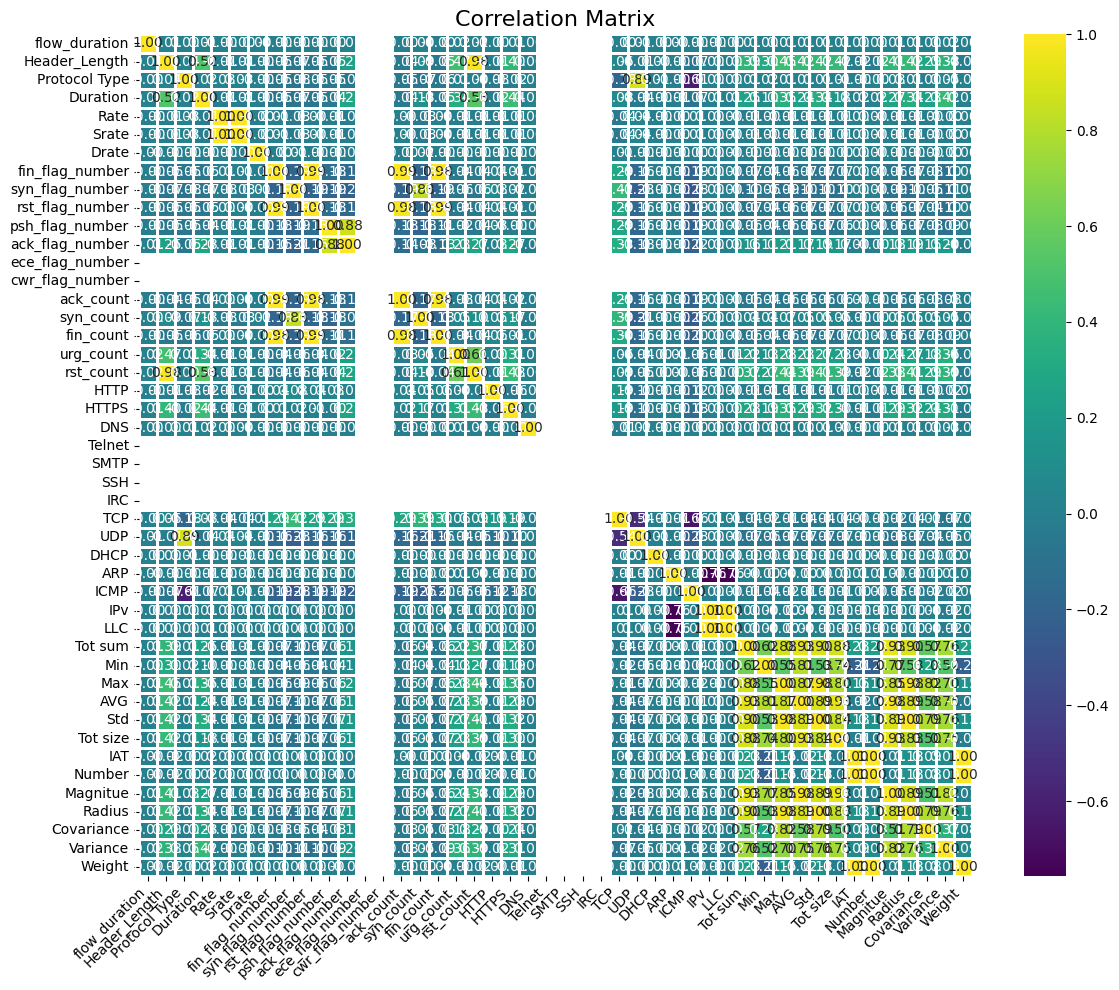

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming scaled_df is your DataFrame containing scaled data
# Compute the correlation matrix
df_features= df_ddos.drop('label', axis=1)

corr_matrix = df_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with seaborn using a different color map
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1, linecolor='white')

# Customize the plot
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# List of columns to drop
columns_to_drop = ['ece_flag_number', 'cwr_flag_number', 'Telnet','SMTP','SSH','IRC','UDP']

# Drop the specified columns
df_cleaned = df_ddos.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print("DataFrame after dropping columns:")
print(df_cleaned.head())

DataFrame after dropping columns:
   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
2       0.084227        30523.0           17.0      64.0  8442.058187   
3       0.000000            0.0            1.0      64.0     5.093716   
4       0.000000           54.0            6.0      64.0    18.108917   
5       0.000000           54.0            6.0      64.0    76.155532   
6       1.920231       336224.2            6.0      64.0   129.931358   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
2  8442.058187    0.0              0.0              0.0              0.0  ...   
3     5.093716    0.0              0.0              0.0              0.0  ...   
4    18.108917    0.0              0.0              0.0              0.0  ...   
5    76.155532    0.0              0.0              0.0              0.0  ...   
6   129.931358    0.0              0.0              0.0              0.0  ...   

          Std  Tot size           IAT  N

In [ ]:
df_ddos.shape


(170511, 47)

In [ ]:
df_ddos.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
df_ddos

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
2,0.084227,30523.0,17.0,64.0,8442.058187,8442.058187,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.312381e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,DDoS-UDP_Flood
3,0.000000,0.0,1.0,64.0,5.093716,5.093716,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314976e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
4,0.000000,54.0,6.0,64.0,18.108917,18.108917,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.306752e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-TCP_Flood
5,0.000000,54.0,6.0,64.0,76.155532,76.155532,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.331408e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-PSHACK_Flood
6,1.920231,336224.2,6.0,64.0,129.931358,129.931358,0.0,0.0,0.0,0.0,...,865.724025,1711.5,1.665242e+08,13.5,57.742961,1227.053653,755440.284897,1.0,244.60,BenignTraffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227138,0.000000,0.0,1.0,64.0,73.844030,73.844030,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312484e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
227140,0.000000,54.0,6.0,64.0,15.454601,15.454601,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336119e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-SynonymousIP_Flood
227141,0.000000,54.0,6.0,64.0,16.331052,16.331052,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.303406e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-TCP_Flood
227143,0.000000,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.348321e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood


In [ ]:
df_ddos.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
df_ddos.to_csv('only_ddos_data.csv',index=False)

In [ ]:
df_only_ddos = pd.read_csv("only_ddos_data.csv")
df_only_ddos

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.084227,30523.0,17.0,64.0,8442.058187,8442.058187,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.312381e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,DDoS-UDP_Flood
1,0.000000,0.0,1.0,64.0,5.093716,5.093716,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314976e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
2,0.000000,54.0,6.0,64.0,18.108917,18.108917,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.306752e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-TCP_Flood
3,0.000000,54.0,6.0,64.0,76.155532,76.155532,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.331408e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-PSHACK_Flood
4,1.920231,336224.2,6.0,64.0,129.931358,129.931358,0.0,0.0,0.0,0.0,...,865.724025,1711.5,1.665242e+08,13.5,57.742961,1227.053653,755440.284897,1.0,244.60,BenignTraffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170506,0.000000,0.0,1.0,64.0,73.844030,73.844030,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312484e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
170507,0.000000,54.0,6.0,64.0,15.454601,15.454601,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336119e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-SynonymousIP_Flood
170508,0.000000,54.0,6.0,64.0,16.331052,16.331052,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.303406e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-TCP_Flood
170509,0.000000,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.348321e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood


In [ ]:
from imblearn.over_sampling import SMOTE


# Assuming 'label' is the target column
X = df_only_ddos.drop('label', axis=1)
y = df_only_ddos['label']



# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Merge resampled features and labels into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='label')], axis=1)

In [ ]:
df_resampled.to_csv('resampled.csv',index = False)

In [ ]:
df_res = pd.read_csv('resampled.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
features = df_res.drop('label', axis=1)
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
scaled_df = pd.concat([scaled_features, df_res['label']], axis=1)


In [ ]:
scaled_df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456937 entries, 0 to 456936
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    456937 non-null  float64
 1   Header_Length    456937 non-null  float64
 2   Protocol Type    456937 non-null  float64
 3   Duration         456937 non-null  float64
 4   Rate             456937 non-null  float64
 5   Srate            456937 non-null  float64
 6   Drate            456937 non-null  float64
 7   fin_flag_number  456937 non-null  float64
 8   syn_flag_number  456937 non-null  float64
 9   rst_flag_number  456937 non-null  float64
 10  psh_flag_number  456937 non-null  float64
 11  ack_flag_number  456937 non-null  float64
 12  ece_flag_number  456937 non-null  float64
 13  cwr_flag_number  456937 non-null  float64
 14  ack_count        456937 non-null  float64
 15  syn_count        456937 non-null  float64
 16  fin_count        456937 non-null  floa

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
scaled_df['label_encoder'] = enc.fit_transform(scaled_df['label'])

In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456937 entries, 0 to 456936
Data columns (total 48 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    456937 non-null  float64
 1   Header_Length    456937 non-null  float64
 2   Protocol Type    456937 non-null  float64
 3   Duration         456937 non-null  float64
 4   Rate             456937 non-null  float64
 5   Srate            456937 non-null  float64
 6   Drate            456937 non-null  float64
 7   fin_flag_number  456937 non-null  float64
 8   syn_flag_number  456937 non-null  float64
 9   rst_flag_number  456937 non-null  float64
 10  psh_flag_number  456937 non-null  float64
 11  ack_flag_number  456937 non-null  float64
 12  ece_flag_number  456937 non-null  float64
 13  cwr_flag_number  456937 non-null  float64
 14  ack_count        456937 non-null  float64
 15  syn_count        456937 non-null  float64
 16  fin_count        456937 non-null  floa

In [ ]:
scaled_df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label',
       'label_encoder'],
      dtype='object')

In [ ]:
scaled_df_drop_label=scaled_df.drop(['label'],axis=1)

In [ ]:
scaled_df_drop_label.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label_encoder      0
dtype: int64

In [ ]:
scaled_df_drop_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456937 entries, 0 to 456936
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    456937 non-null  float64
 1   Header_Length    456937 non-null  float64
 2   Protocol Type    456937 non-null  float64
 3   Duration         456937 non-null  float64
 4   Rate             456937 non-null  float64
 5   Srate            456937 non-null  float64
 6   Drate            456937 non-null  float64
 7   fin_flag_number  456937 non-null  float64
 8   syn_flag_number  456937 non-null  float64
 9   rst_flag_number  456937 non-null  float64
 10  psh_flag_number  456937 non-null  float64
 11  ack_flag_number  456937 non-null  float64
 12  ece_flag_number  456937 non-null  float64
 13  cwr_flag_number  456937 non-null  float64
 14  ack_count        456937 non-null  float64
 15  syn_count        456937 non-null  float64
 16  fin_count        456937 non-null  floa

In [ ]:
scaled_df_drop_label['label_encoder'].unique()

array([11,  3, 10,  5,  0,  9,  7,  6,  4, 12,  1,  8,  2])

In [ ]:
scaled_df['label'].unique()

array(['DDoS-UDP_Flood', 'DDoS-ICMP_Flood', 'DDoS-TCP_Flood',
       'DDoS-PSHACK_Flood', 'BenignTraffic', 'DDoS-SynonymousIP_Flood',
       'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-ICMP_Fragmentation',
       'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation',
       'DDoS-SlowLoris', 'DDoS-HTTP_Flood'], dtype=object)

In [ ]:
X_scaled_pca=scaled_df_drop_label.drop('label_encoder', axis=1)
Y_scaled_pca=scaled_df_drop_label['label_encoder']

In [ ]:
PCA_features=X_scaled_pca.T
covariance_matrix= np.cov(PCA_features)
covariance_matrix

array([[ 1.00000219e+00,  3.29864556e-02,  4.56954150e-03, ...,
         1.05405020e-02,  2.96377378e-02,  2.33706977e-04],
       [ 3.29864556e-02,  1.00000219e+00,  8.30292892e-02, ...,
         2.68590267e-01,  2.22441107e-01, -1.61762645e-02],
       [ 4.56954150e-03,  8.30292892e-02,  1.00000219e+00, ...,
         1.72066612e-02,  7.86796372e-02, -1.93809762e-03],
       ...,
       [ 1.05405020e-02,  2.68590267e-01,  1.72066612e-02, ...,
         1.00000219e+00,  3.53520150e-01,  9.19961483e-02],
       [ 2.96377378e-02,  2.22441107e-01,  7.86796372e-02, ...,
         3.53520150e-01,  1.00000219e+00,  7.11525459e-02],
       [ 2.33706977e-04, -1.61762645e-02, -1.93809762e-03, ...,
         9.19961483e-02,  7.11525459e-02,  1.00000219e+00]])

In [ ]:
values, vectors = np.linalg.eig(covariance_matrix)

In [ ]:
values.shape

(46,)

In [ ]:
vectors.shape

(46, 46)

In [ ]:
percentage_variance = []
for i in range(len(values)):
  percentage_variance.append(values[i]/np.sum(values))
percentage_variance

[0.23258056397757812,
 0.0974171106109599,
 0.08792560985545618,
 0.07765850942289641,
 0.06718054691328944,
 0.05489967803057328,
 0.04973215791798971,
 0.04450621513575176,
 0.04069195899935787,
 0.02853557450295317,
 0.022505334589398258,
 0.024837420001588777,
 0.024981744172902585,
 0.025001435224006267,
 0.02499544383936084,
 0.019547097435728036,
 0.01436075558112287,
 0.01069678563930367,
 0.00917035580252207,
 0.007404810068701044,
 0.0077979574119782,
 0.005742672119588246,
 0.005073854689352228,
 0.004057039627410327,
 0.0031446388863478293,
 0.0021832813708073107,
 0.0018399340859925643,
 0.0013281359139150706,
 0.0013399251452622443,
 0.001016899267183421,
 0.0008935501060014532,
 0.000466383013729637,
 0.00020501881532829116,
 0.00016099305582571564,
 7.393115912774707e-05,
 4.468418885382272e-05,
 1.4243829581442055e-06,
 5.690388974206502e-07,
 2.3062711514600313e-19,
 -2.856859388926207e-18,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

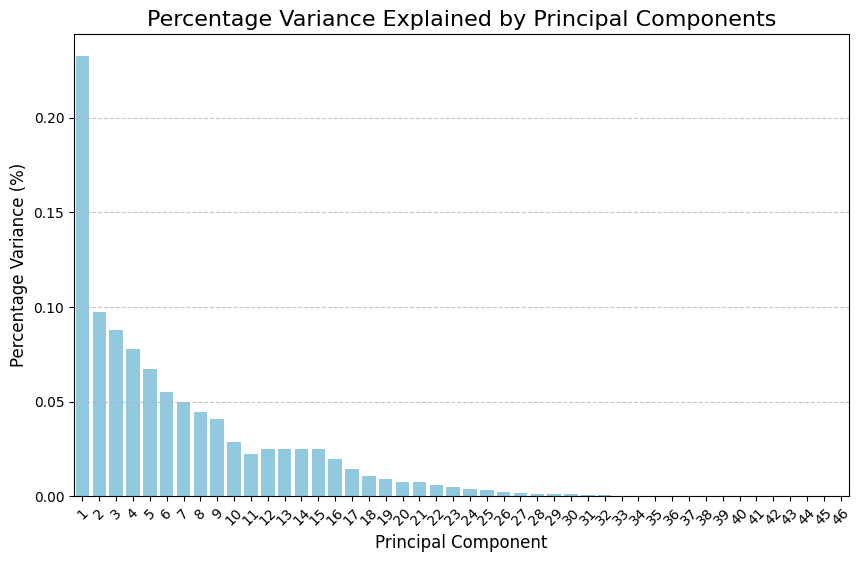

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(percentage_variance) + 1)), y=percentage_variance, color='skyblue')
plt.title('Percentage Variance Explained by Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Percentage Variance (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
projected_1 = X_scaled_pca.dot(vectors.T[0])
projected_2 = X_scaled_pca.dot(vectors.T[1])
projected_3 = X_scaled_pca.dot(vectors.T[2])
projected_4 = X_scaled_pca.dot(vectors.T[3])
projected_5 = X_scaled_pca.dot(vectors.T[4])
projected_6 = X_scaled_pca.dot(vectors.T[5])
projected_7 = X_scaled_pca.dot(vectors.T[6])
projected_8 = X_scaled_pca.dot(vectors.T[7])
projected_9 = X_scaled_pca.dot(vectors.T[8])
projected_10 = X_scaled_pca.dot(vectors.T[9])
projected_11 = X_scaled_pca.dot(vectors.T[10])
projected_12 = X_scaled_pca.dot(vectors.T[11])
projected_13 = X_scaled_pca.dot(vectors.T[12])
projected_14 = X_scaled_pca.dot(vectors.T[13])
projected_15 = X_scaled_pca.dot(vectors.T[14])
projected_16 = X_scaled_pca.dot(vectors.T[15])
projected_17 = X_scaled_pca.dot(vectors.T[16])
projected_18 = X_scaled_pca.dot(vectors.T[17])
projected_19 = X_scaled_pca.dot(vectors.T[18])
projected_20 = X_scaled_pca.dot(vectors.T[19])
projected_21 = X_scaled_pca.dot(vectors.T[20])
projected_22 = X_scaled_pca.dot(vectors.T[21])
projected_23 = X_scaled_pca.dot(vectors.T[22])
projected_24 = X_scaled_pca.dot(vectors.T[23])
projected_25 = X_scaled_pca.dot(vectors.T[24])

result_pca = pd.DataFrame(projected_1, columns= ['PC1'])
result_pca['PC2'] = projected_2
result_pca['PC3'] = projected_3
result_pca['PC4'] = projected_4
result_pca['PC5'] = projected_5
result_pca['PC6'] = projected_6
result_pca['PC7'] = projected_7
result_pca['PC8'] = projected_8
result_pca['PC9'] = projected_9
result_pca['PC10'] = projected_10
result_pca['PC11'] = projected_11
result_pca['PC12'] = projected_12
result_pca['PC13'] = projected_13
result_pca['PC14'] = projected_14
result_pca['PC15'] = projected_15
result_pca['PC16'] = projected_16
result_pca['PC17'] = projected_17
result_pca['PC18'] = projected_18
result_pca['PC19'] = projected_19
result_pca['PC20'] = projected_20
result_pca['PC21'] = projected_21
result_pca['PC22'] = projected_22
result_pca['PC23'] = projected_23
result_pca['PC24'] = projected_24
result_pca['PC25'] = projected_25

result_pca['label']= Y_scaled_pca
result_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,label
0,1.706160,-2.016260,-0.913093,0.156888,0.011735,3.443750,0.722058,1.340086,-0.048373,-0.464140,...,0.217045,0.540265,0.050418,-0.229598,-0.011712,-0.162443,0.057282,0.206654,0.065707,11
1,1.611368,-1.778666,-0.487481,0.160861,-0.004538,-0.260690,0.053598,-2.806669,-0.425612,-0.912713,...,0.208405,0.169240,0.094361,0.073584,0.009366,-0.014460,0.054339,-0.416322,0.107487,3
2,1.917571,-0.507746,-0.603548,0.173478,-0.023097,0.144038,0.172389,-0.479431,-0.007438,0.465651,...,-0.204090,-0.954991,0.741027,0.680072,0.045871,-0.415719,0.398409,0.186644,0.410848,10
3,2.056029,0.470782,-1.322396,0.308684,-0.055794,-0.397846,-0.112764,0.005338,-2.989235,2.057511,...,0.097127,0.306231,-0.421199,-0.054429,-0.011165,0.068933,-0.035494,0.000278,0.063007,5
4,-8.140825,2.065843,1.427619,6.110586,-0.389164,-1.190782,-0.147834,0.984380,0.529235,1.013494,...,0.564876,2.106123,1.403238,0.278678,0.295994,0.282175,-1.113044,1.314251,2.107213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456932,-4.308352,-2.076983,0.529735,-0.301596,0.008916,1.677102,0.622786,1.874487,0.168638,0.058416,...,0.174455,0.306835,-0.239865,-0.302365,-0.028279,0.013415,-0.067356,0.207670,-0.015351,12
456933,-4.089975,-2.445409,0.478204,-0.280781,0.009511,2.181859,0.728089,2.290498,0.093147,-0.083448,...,0.097809,0.713525,-0.246543,-0.647408,-0.052459,-0.205040,0.063742,0.766564,-0.217873,12
456934,-3.659847,-1.729632,0.597053,-0.143196,-0.005891,0.598198,0.398786,1.306875,0.101044,0.256138,...,-0.253197,-0.601163,-0.193039,0.391474,0.019872,0.531221,-0.394595,-0.789311,0.141162,12
456935,-4.247110,-2.000010,0.526534,-0.345835,0.012676,1.610583,0.608608,1.774826,0.157430,0.116539,...,0.190250,0.130401,-0.176893,-0.209851,-0.025167,0.049824,0.013627,-0.155266,-0.126609,12


In [ ]:
result_pca.isnull().sum()

PC1      0
PC2      0
PC3      0
PC4      0
PC5      0
PC6      0
PC7      0
PC8      0
PC9      0
PC10     0
PC11     0
PC12     0
PC13     0
PC14     0
PC15     0
PC16     0
PC17     0
PC18     0
PC19     0
PC20     0
PC21     0
PC22     0
PC23     0
PC24     0
PC25     0
label    0
dtype: int64

<Axes: >

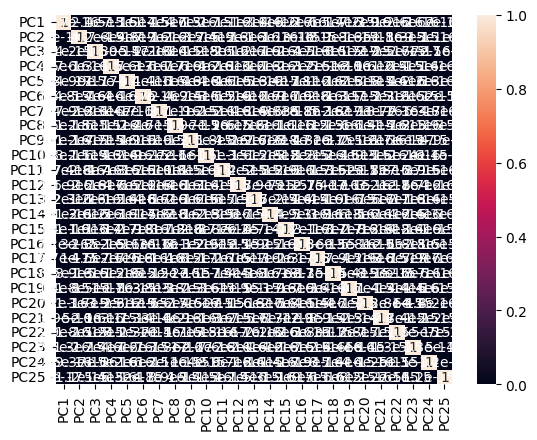

In [ ]:
X_pca_heatmap= result_pca[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25']]
sns.heatmap(X_pca_heatmap.corr(), annot=True)

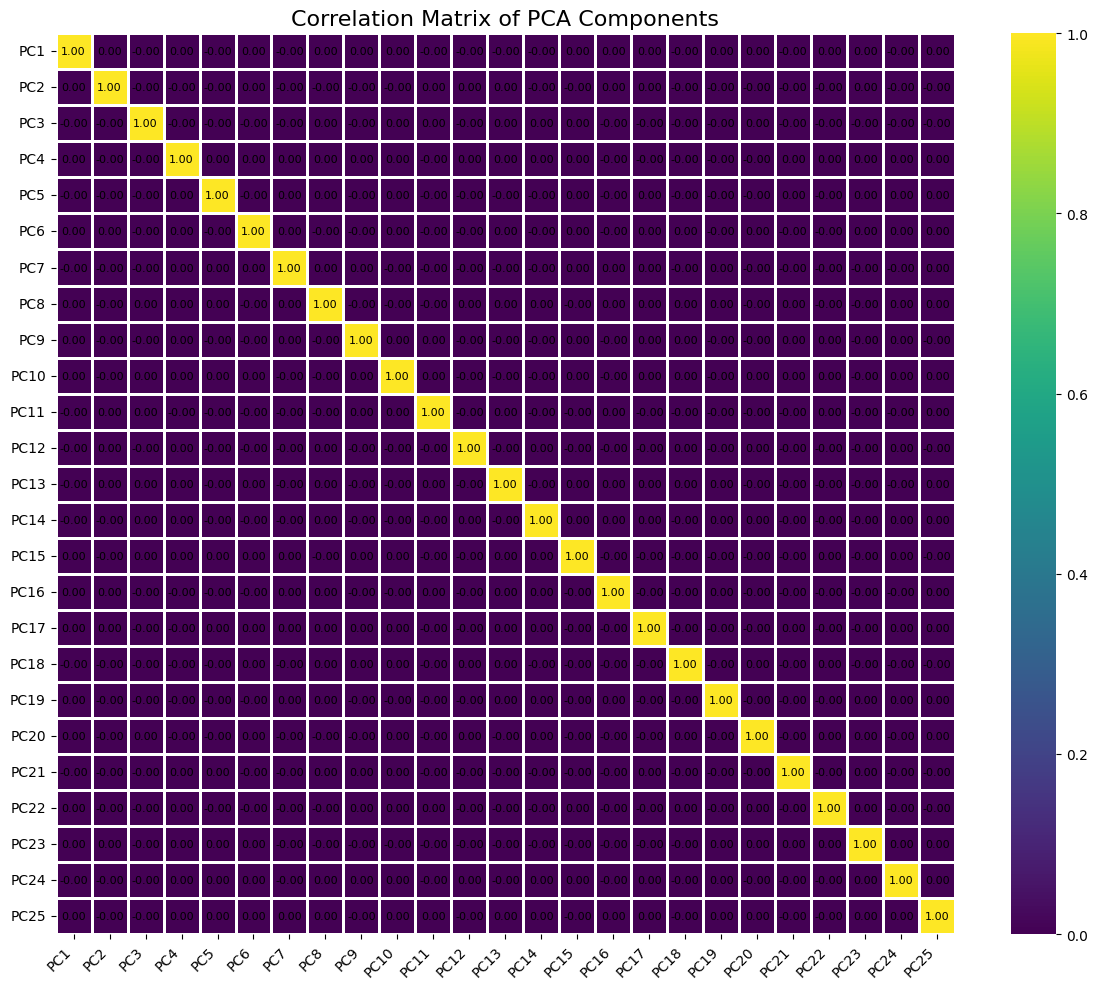

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming result_pca is your DataFrame containing the PCA results
X_pca_heatmap = result_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25']]

# Compute the correlation matrix
corr_matrix = X_pca_heatmap.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', annot_kws={"size": 8, "color": "black"}, linewidths=1, linecolor='white')

# Customize the plot
plt.title('Correlation Matrix of PCA Components', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-48-94b77f889fbd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast


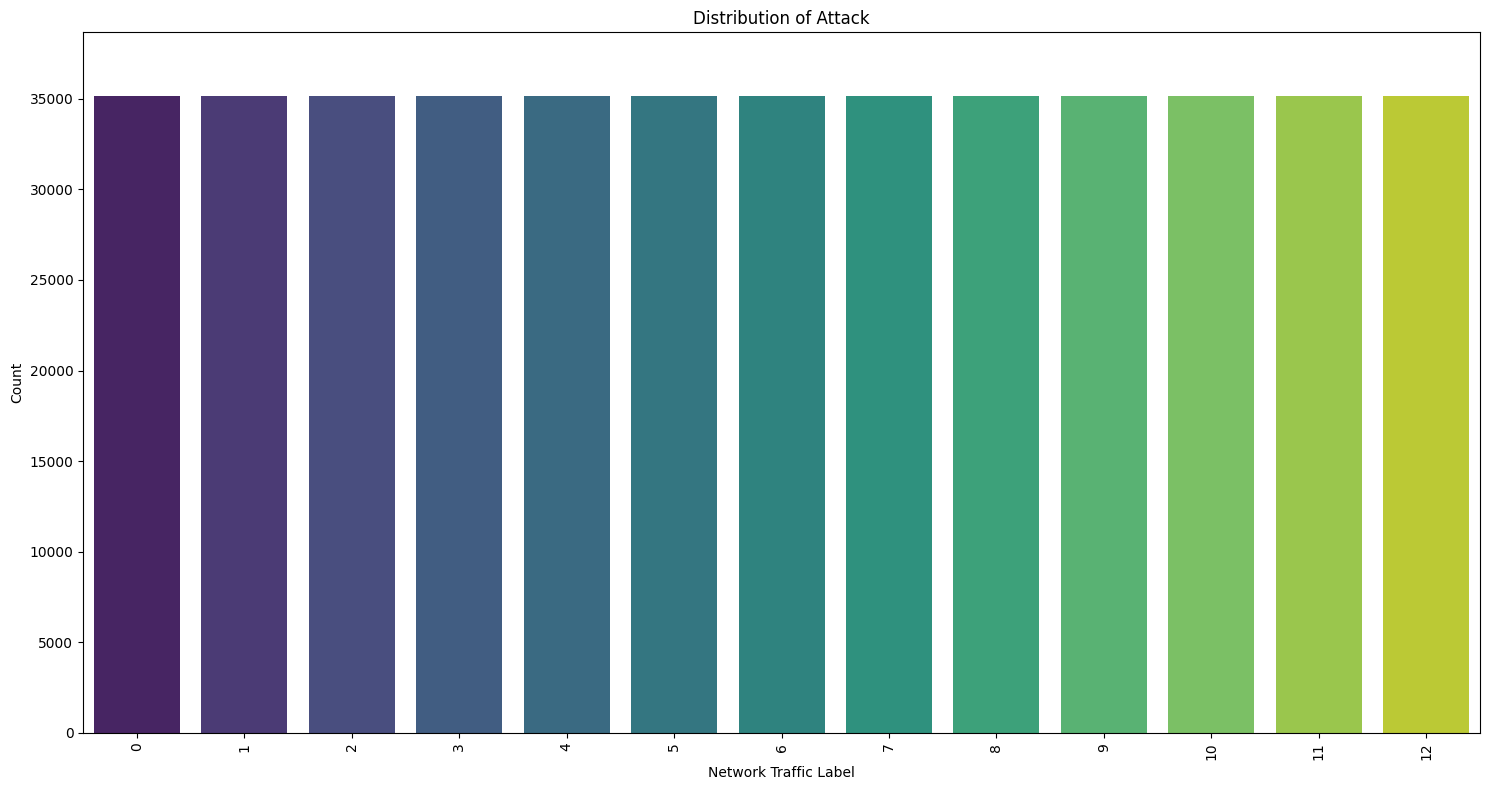

In [ ]:
class_counts = result_pca['label'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 8))  # Increased figure size for better readability
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast
plt.title('Distribution of Attack')
plt.xlabel('Network Traffic Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Changed rotation to 90 degrees to prevent overlapping

# Set a variable for the maximum height of the y-axis, slightly more than the highest bar
max_height = max(class_counts.values) * 1.1
plt.ylim(0, max_height)  # Set the y-axis limit to accommodate the percentage annotations




plt.tight_layout()

Training Time: 57.4725 seconds
Model Size: 2199.14 KB
Memory Usage: 2363.36 MB
Prediction Time: 0.6571 seconds
Accuracy: 0.9872
Precision: 0.9875
Recall: 0.9872
F1-score: 0.9873


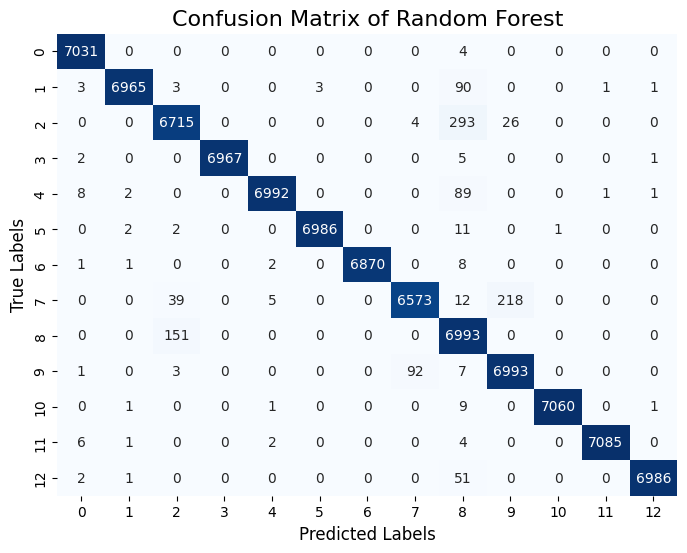

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with optimized parameters
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)

# Measure training time
start_train_time = time.time()
rf_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(rf_classifier, 'rf_model.pkl')
model_size = os.path.getsize('rf_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = rf_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 0.0994 seconds
Model Size (Training Data Size): 78.09 MB
Memory Usage: 2566.33 MB
Prediction Time: 200.0509 seconds
Accuracy: 0.9941
Precision: 0.9941
Recall: 0.9941
F1-score: 0.9941


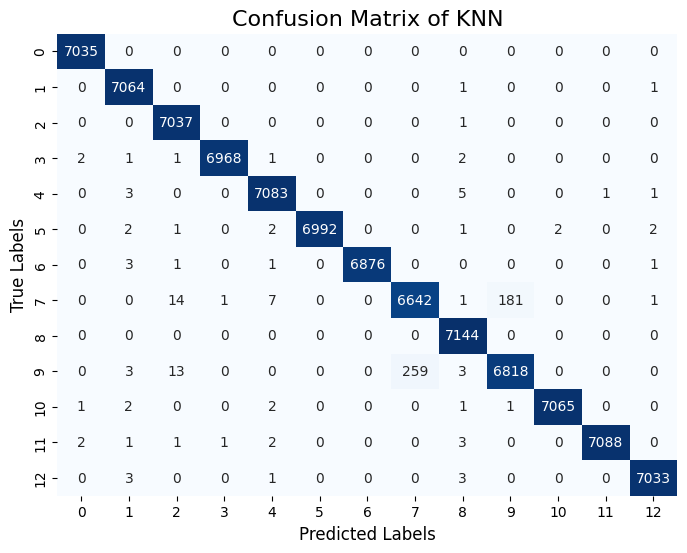

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import os

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Measure training time
start_train_time = time.time()
knn_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = knn_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate model size (size of the training data)
train_data_size = (X_train.memory_usage(deep=True).sum() + y_train.memory_usage(deep=True)) / 1024 ** 2  # Convert bytes to megabytes

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size (Training Data Size): {train_data_size:.2f} MB')
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of KNN', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


In [ ]:
pip install lightgbm scikit-learn


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 380161, number of used features: 3
[LightGBM] [Info] Start training from score -2.567831
[LightGBM] [Info] Start training from score -2.565707
[LightGBM] [Info] Start training from score -2.560383
[LightGBM] [Info] Start training from score -2.566221
[LightGBM] [Info] Start training from score -2.562973
[LightGBM] [Info] Start training from score -2.562461
[LightGBM] [Info] Start training from score -2.562803
[LightGBM] [Info] Start training from score -2.563554
[LightGBM] [Info] Start training from score -2.568620
[LightGBM] [Info] Start training from score -2.565605
[LightGBM] [Info] Start training from score -2.564203
[LightGBM] [Info] Start training from score -2.567523
[LightGBM] [Info] Start training from score -2.566495
Training u

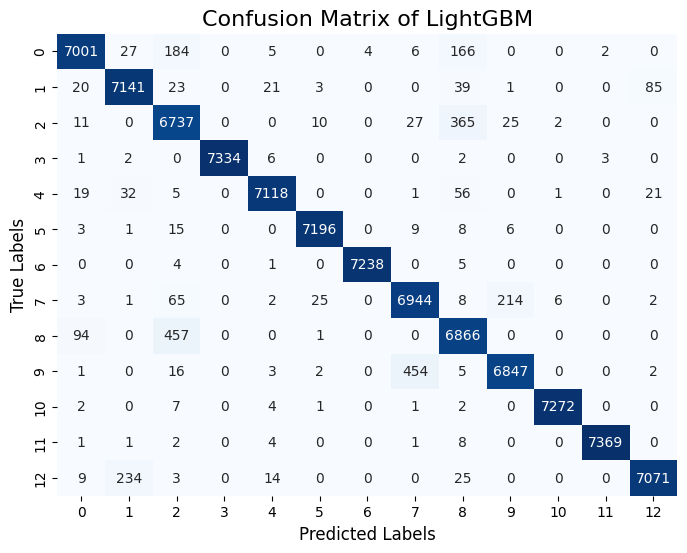

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time
import joblib
import os
import psutil
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'label' is your target variable and the rest are features
X = result_pca.drop('label', axis=1)
Y = result_pca['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',  # Use 'multiclass' for multi-class classification
    'num_class': len(Y.unique()),  # Number of classes
    'metric': 'multi_logloss',  # Use 'multi_logloss' for multi-class classification
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Measure training time
start_train_time = time.time()
bst = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
bst.save_model('lightgbm_model.txt')
model_size = os.path.getsize('lightgbm_model.txt')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Predict on the test set
start_pred_time = time.time()
y_pred_prob = bst.predict(X_test, num_iteration=bst.best_iteration)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time
y_pred = [np.argmax(x) for x in y_pred_prob]  # For multiclass classification

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of LightGBM', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 258.0553 seconds
Model Size: 4.12 KB
Memory Usage: 2675.16 MB
Prediction Time: 0.0444 seconds
Accuracy: 0.9363
Precision: 0.9414
Recall: 0.9363
F1-score: 0.9360


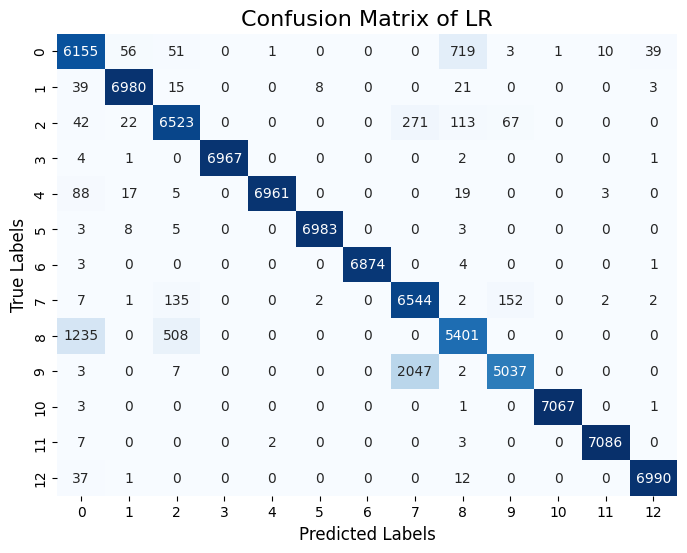

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Measure training time
start_train_time = time.time()
logreg_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(logreg_classifier, 'logreg_model.pkl')
model_size = os.path.getsize('logreg_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Make predictions on the test set
start_pred_time = time.time()
y_pred = logreg_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of LR', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 21.6533 seconds
Model Size: 383.89 KB
Memory Usage: 2610.59 MB
Prediction Time: 0.0275 seconds
Accuracy: 0.9963
Precision: 0.9963
Recall: 0.9963
F1-score: 0.9963


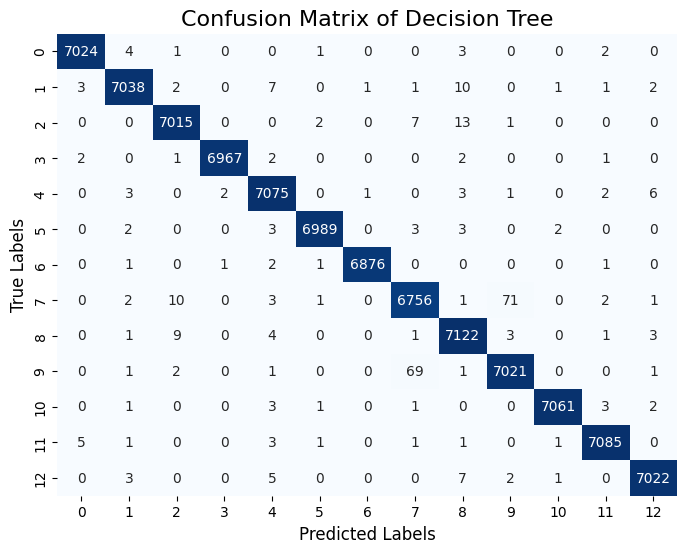

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Measure training time
start_train_time = time.time()
dt_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(dt_classifier, 'dt_model.pkl')
model_size = os.path.getsize('dt_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = dt_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Decision Tree', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 0.2961 seconds
Model Size: 6.66 KB
Memory Usage: 2612.95 MB
Prediction Time: 0.1329 seconds
Accuracy: 0.8575
Precision: 0.8947
Recall: 0.8585
F1-score: 0.8495


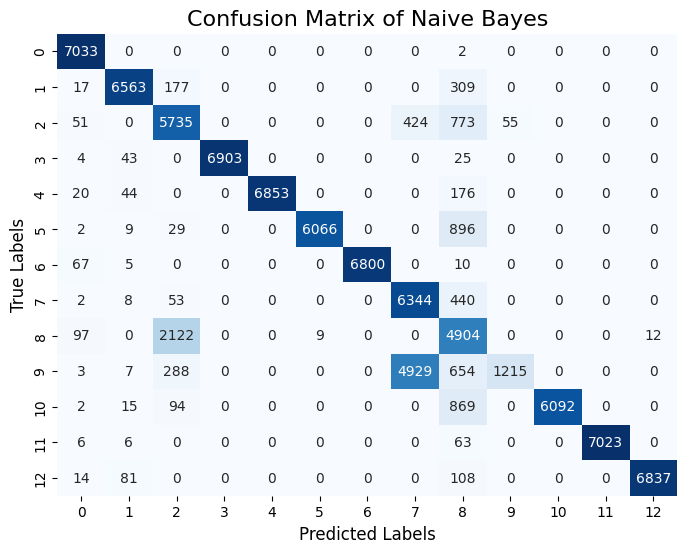

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Measure training time
start_train_time = time.time()
nb_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(nb_classifier, 'nb_model.pkl')
model_size = os.path.getsize('nb_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = nb_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Naive Bayes', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


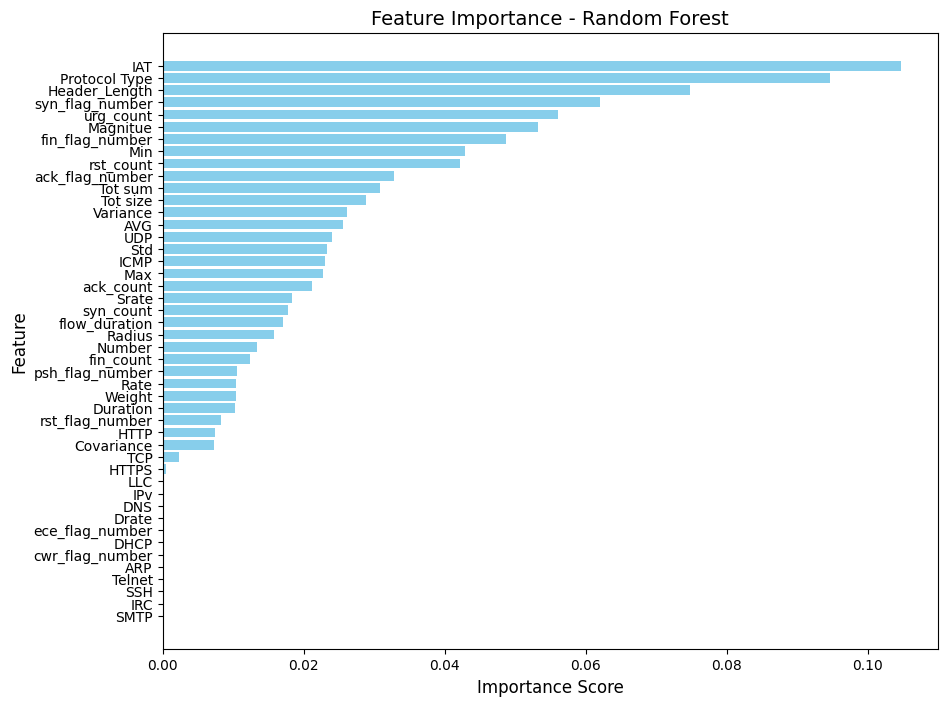

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


X = scaled_df_drop_label.drop('label_encoder', axis=1)
y = scaled_df_drop_label['label_encoder']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Retrieve feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance - Random Forest', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


            Feature  Importance
39              IAT    0.104654
2     Protocol Type    0.094664
1     Header_Length    0.074728
8   syn_flag_number    0.062070
17        urg_count    0.056052
41         Magnitue    0.053191
7   fin_flag_number    0.048673
34              Min    0.042862
18        rst_count    0.042152
11  ack_flag_number    0.032820
33          Tot sum    0.030843
38         Tot size    0.028903
44         Variance    0.026220
36              AVG    0.025658
27              UDP    0.024039
37              Std    0.023390
30             ICMP    0.023064
35              Max    0.022755
14        ack_count    0.021141
5             Srate    0.018333
15        syn_count    0.017727
0     flow_duration    0.017102
42           Radius    0.015853
40           Number    0.013369
16        fin_count    0.012392


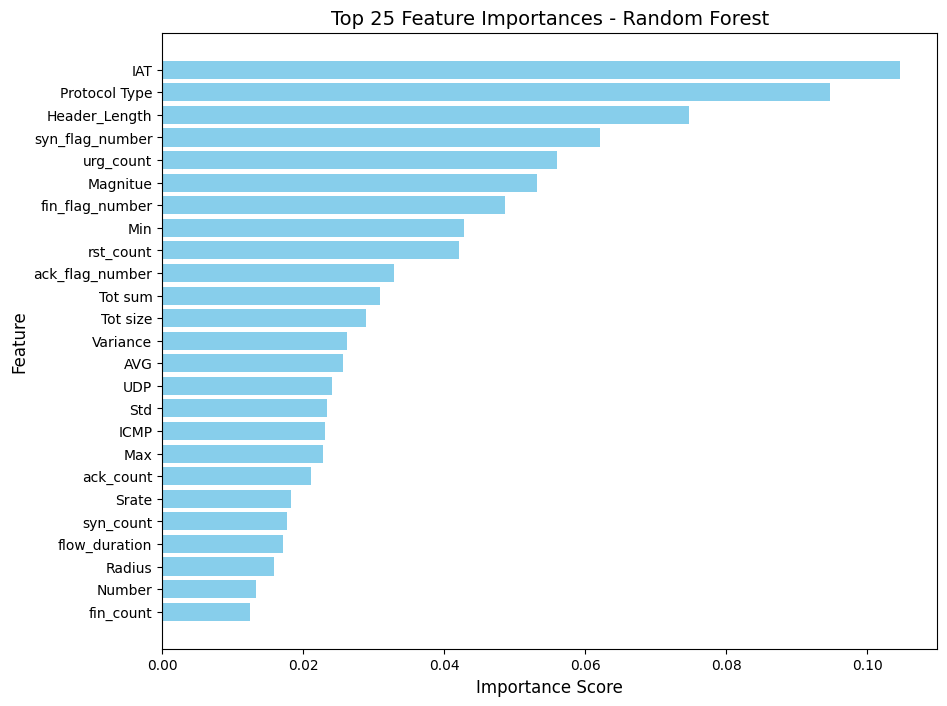

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming scaled_df_drop_label is already defined
X = scaled_df_drop_label.drop('label_encoder', axis=1)
y = scaled_df_drop_label['label_encoder']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Retrieve feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance (descending order) and get top 25 features
top_25_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(25)

# Print the top 25 features
print(top_25_features)

# Plotting the top 25 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_25_features['Feature'], top_25_features['Importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 25 Feature Importances - Random Forest', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [ ]:
selected_features = ['IAT','Protocol Type','Header_Length','syn_flag_number','urg_count','Magnitue','fin_flag_number','Min','rst_count','ack_flag_number','Tot sum','Tot size','Variance','AVG','UDP','Std','ICMP','Max','ack_count','Srate','syn_count','flow_duration','Radius','Number','fin_count','label_encoder']
rf_scaled_df= scaled_df_drop_label[selected_features]

In [ ]:
rf_scaled_df

,IAT,Protocol Type,Header_Length,syn_flag_number,urg_count,Magnitue,fin_flag_number,Min,rst_count,ack_flag_number,...,ICMP,Max,ack_count,Srate,syn_count,flow_duration,Radius,Number,fin_count,label_encoder
0,-0.003683,2.180465,-0.175815,-0.447019,-0.232015,-0.723572,-0.29461,-0.556530,-0.217966,-0.651158,...,-0.423260,-0.614793,-0.393937,0.015075,-0.654825,-0.031370,-0.655665,0.003727,-0.400761,11
1,-0.002561,-1.340457,-0.241135,-0.447019,-0.232015,-0.782380,-0.29461,-0.611331,-0.217966,-0.651158,...,2.365303,-0.623867,-0.393937,-0.089553,-0.654825,-0.031759,-0.655665,0.003727,-0.400761,3
2,-0.006116,-0.240169,-0.241019,-0.447019,-0.232015,-0.695937,-0.29461,-0.529129,-0.217966,-0.651158,...,-0.423260,-0.610256,-0.393937,-0.089392,-0.654825,-0.031759,-0.655665,0.003727,-0.400761,10
3,0.004541,-0.240169,-0.241019,-0.447019,-0.213908,-0.695937,-0.29461,-0.529129,-0.215773,1.586985,...,-0.423260,-0.610256,-0.393937,-0.088672,-0.654825,-0.031759,-0.655665,0.003727,-0.400761,5
4,3.600981,-0.240169,0.478396,-0.447019,-0.003868,2.639534,-0.29461,-0.446927,0.327010,1.586985,...,-0.423260,2.688147,-0.393937,-0.088005,1.816130,-0.022886,2.351286,3.604936,-0.400761,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456932,0.006984,2.058653,0.373257,-0.447019,-0.229095,1.743247,-0.29461,1.583305,-0.216516,-0.651158,...,-0.423260,1.143175,-0.393937,-0.086565,-0.580298,-0.022792,1.209908,0.003727,-0.400761,12
456933,0.006997,2.176680,-0.109284,-0.447019,-0.232015,1.656494,-0.29461,1.711631,-0.217966,-0.651158,...,-0.423260,1.027396,-0.393937,-0.086344,-0.654825,-0.030126,1.235480,0.003727,-0.400761,12
456934,0.007036,1.922614,-0.196290,-0.447019,-0.231294,1.428015,-0.29461,0.911303,-0.217620,-0.651158,...,-0.423260,0.983659,-0.339975,-0.086529,-0.590541,-0.030018,1.260772,0.003727,-0.380949,12
456935,0.006807,2.180465,0.545068,-0.447019,-0.232015,1.651954,-0.29461,1.793010,-0.217966,-0.651158,...,-0.423260,1.025651,-0.393937,-0.084997,-0.654825,-0.028701,1.231719,0.003727,-0.400761,12


In [ ]:
X_rf_scaled_df=rf_scaled_df.drop('label_encoder', axis=1)
Y_rf_scaled_df=rf_scaled_df['label_encoder']
X_rf_scaled_df

,IAT,Protocol Type,Header_Length,syn_flag_number,urg_count,Magnitue,fin_flag_number,Min,rst_count,ack_flag_number,...,Std,ICMP,Max,ack_count,Srate,syn_count,flow_duration,Radius,Number,fin_count
0,-0.003683,2.180465,-0.175815,-0.447019,-0.232015,-0.723572,-0.29461,-0.556530,-0.217966,-0.651158,...,-0.656074,-0.423260,-0.614793,-0.393937,0.015075,-0.654825,-0.031370,-0.655665,0.003727,-0.400761
1,-0.002561,-1.340457,-0.241135,-0.447019,-0.232015,-0.782380,-0.29461,-0.611331,-0.217966,-0.651158,...,-0.656074,2.365303,-0.623867,-0.393937,-0.089553,-0.654825,-0.031759,-0.655665,0.003727,-0.400761
2,-0.006116,-0.240169,-0.241019,-0.447019,-0.232015,-0.695937,-0.29461,-0.529129,-0.217966,-0.651158,...,-0.656074,-0.423260,-0.610256,-0.393937,-0.089392,-0.654825,-0.031759,-0.655665,0.003727,-0.400761
3,0.004541,-0.240169,-0.241019,-0.447019,-0.213908,-0.695937,-0.29461,-0.529129,-0.215773,1.586985,...,-0.656074,-0.423260,-0.610256,-0.393937,-0.088672,-0.654825,-0.031759,-0.655665,0.003727,-0.400761
4,3.600981,-0.240169,0.478396,-0.447019,-0.003868,2.639534,-0.29461,-0.446927,0.327010,1.586985,...,2.344691,-0.423260,2.688147,-0.393937,-0.088005,1.816130,-0.022886,2.351286,3.604936,-0.400761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456932,0.006984,2.058653,0.373257,-0.447019,-0.229095,1.743247,-0.29461,1.583305,-0.216516,-0.651158,...,1.210013,-0.423260,1.143175,-0.393937,-0.086565,-0.580298,-0.022792,1.209908,0.003727,-0.400761
456933,0.006997,2.176680,-0.109284,-0.447019,-0.232015,1.656494,-0.29461,1.711631,-0.217966,-0.651158,...,1.235515,-0.423260,1.027396,-0.393937,-0.086344,-0.654825,-0.030126,1.235480,0.003727,-0.400761
456934,0.007036,1.922614,-0.196290,-0.447019,-0.231294,1.428015,-0.29461,0.911303,-0.217620,-0.651158,...,1.260672,-0.423260,0.983659,-0.339975,-0.086529,-0.590541,-0.030018,1.260772,0.003727,-0.380949
456935,0.006807,2.180465,0.545068,-0.447019,-0.232015,1.651954,-0.29461,1.793010,-0.217966,-0.651158,...,1.231705,-0.423260,1.025651,-0.393937,-0.084997,-0.654825,-0.028701,1.231719,0.003727,-0.400761


<Axes: >

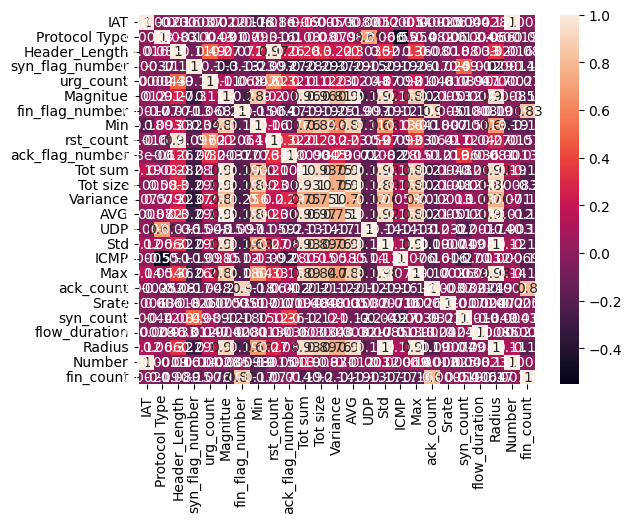

In [ ]:
sns.heatmap(X_rf_scaled_df.corr(), annot=True)

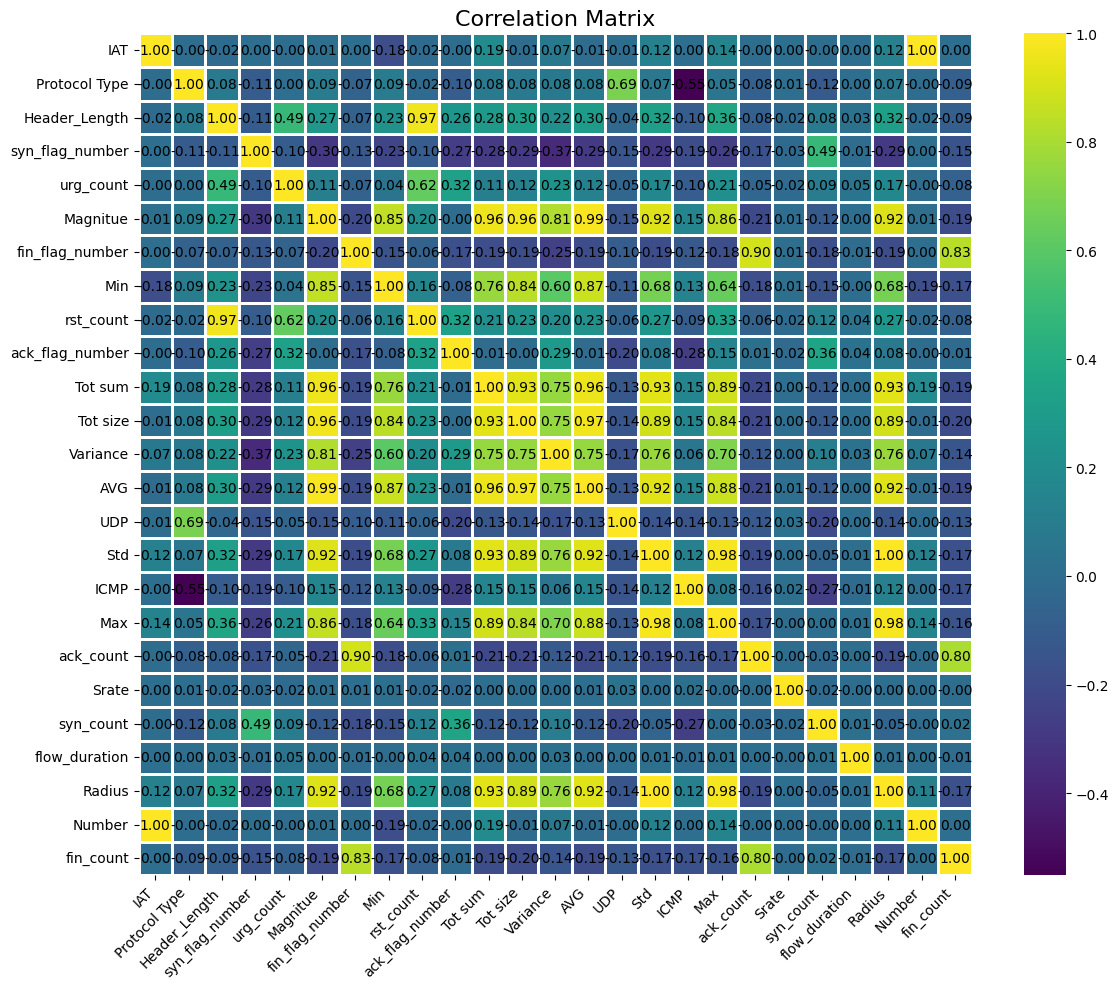

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_rf_scaled_df is your DataFrame containing the scaled data
corr_matrix = X_rf_scaled_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', annot_kws={"size": 10, "color": "black"}, linewidths=1, linecolor='white')

# Customize the plot
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-68-b4a48c1bf0d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast


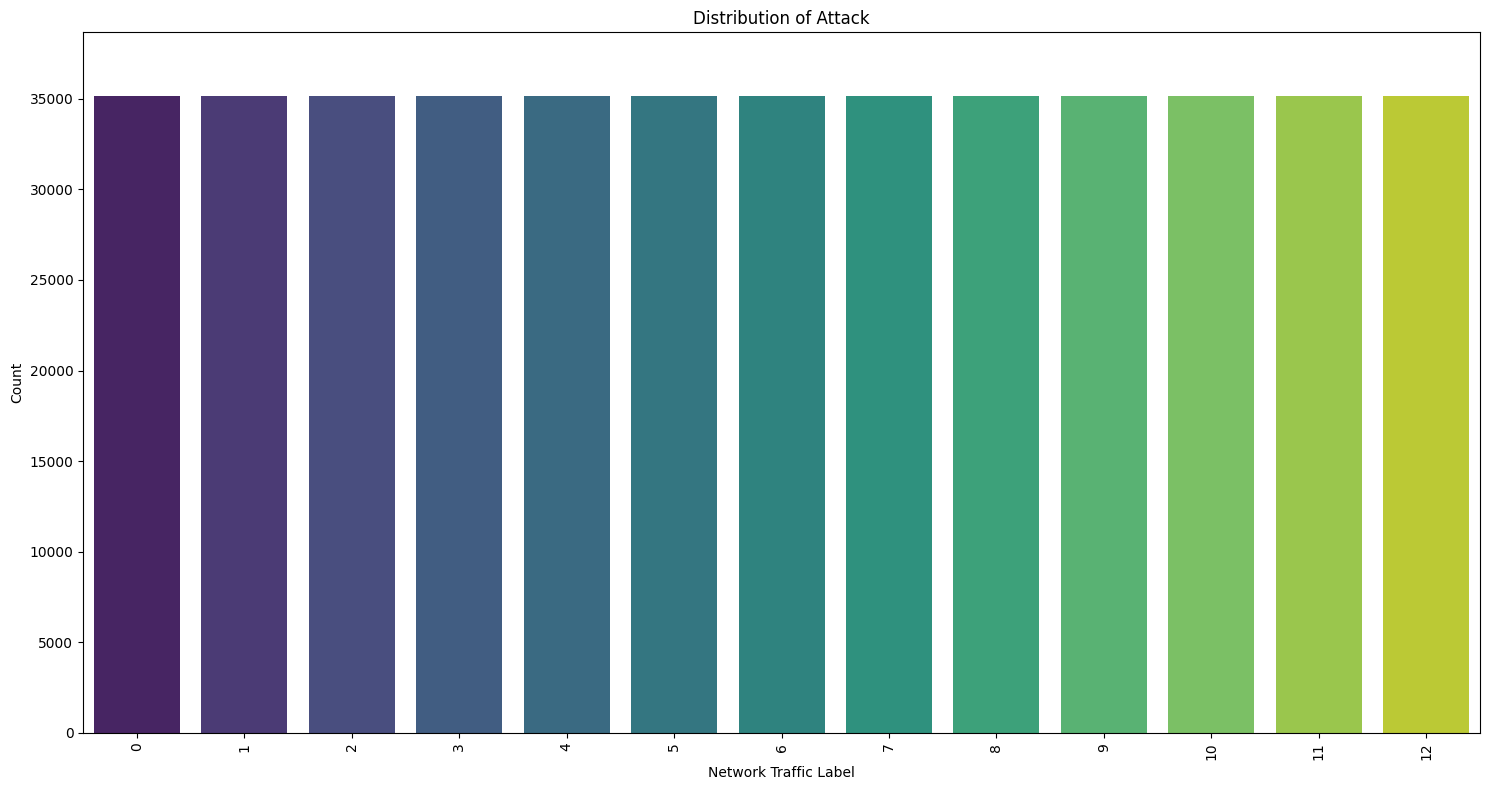

In [ ]:
class_counts = rf_scaled_df['label_encoder'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 8))  # Increased figure size for better readability
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast
plt.title('Distribution of Attack')
plt.xlabel('Network Traffic Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Changed rotation to 90 degrees to prevent overlapping

# Set a variable for the maximum height of the y-axis, slightly more than the highest bar
max_height = max(class_counts.values) * 1.1
plt.ylim(0, max_height)  # Set the y-axis limit to accommodate the percentage annotations




plt.tight_layout()

Training Time: 26.8226 seconds
Model Size: 1127.38 KB
Memory Usage: 2826.82 MB
Prediction Time: 0.3081 seconds
Accuracy: 0.9932
Precision: 0.9933
Recall: 0.9932
F1-score: 0.9932


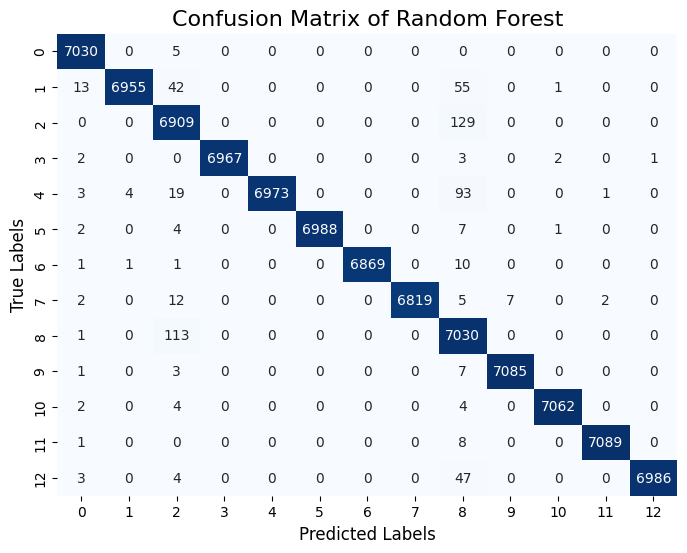

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with optimized parameters
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)

# Measure training time
start_train_time = time.time()
rf_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(rf_classifier, 'rf_model.pkl')
model_size = os.path.getsize('rf_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = rf_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 0.0973 seconds
Model Size (Training Data Size): 78.09 MB
Memory Usage: 2837.21 MB
Prediction Time: 199.3779 seconds
Accuracy: 0.9961
Precision: 0.9961
Recall: 0.9961
F1-score: 0.9961


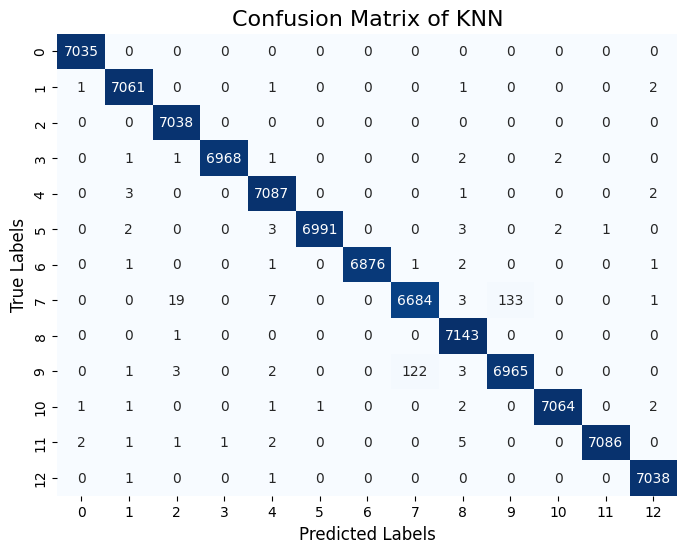

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import os


# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Measure training time
start_train_time = time.time()
knn_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = knn_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate model size (size of the training data)
train_data_size = (X_train.memory_usage(deep=True).sum() + y_train.memory_usage(deep=True)) / 1024 ** 2  # Convert bytes to megabytes

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size (Training Data Size): {train_data_size:.2f} MB')
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of KNN', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 270.7638 seconds
Model Size: 4.23 KB
Memory Usage: 2907.27 MB
Prediction Time: 0.0491 seconds
Accuracy: 0.9362
Precision: 0.9406
Recall: 0.9362
F1-score: 0.9360


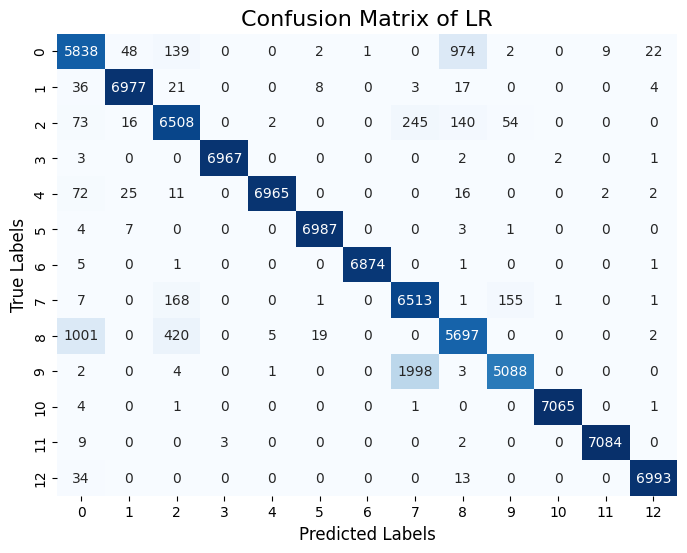

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Measure training time
start_train_time = time.time()
logreg_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(logreg_classifier, 'logreg_model.pkl')
model_size = os.path.getsize('logreg_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Make predictions on the test set
start_pred_time = time.time()
y_pred = logreg_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of LR', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

Training Time: 8.5616 seconds
Model Size: 106.81 KB
Memory Usage: 2837.59 MB
Prediction Time: 0.0193 seconds
Accuracy: 0.9994
Precision: 0.9994
Recall: 0.9994
F1-score: 0.9994


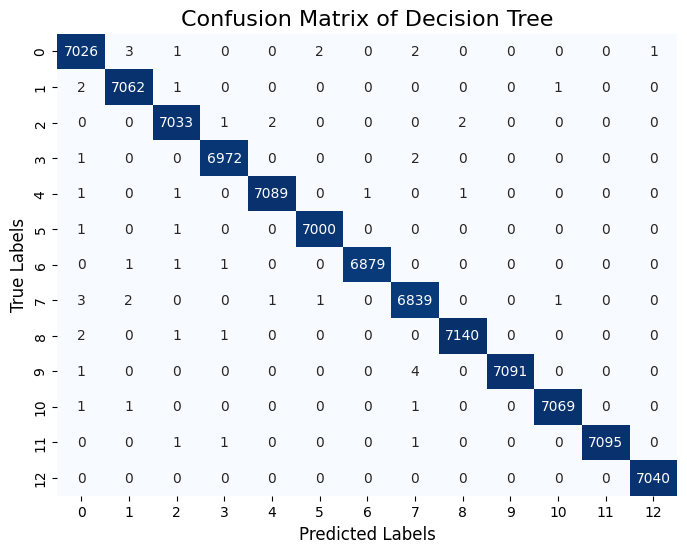

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Measure training time
start_train_time = time.time()
dt_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(dt_classifier, 'dt_model.pkl')
model_size = os.path.getsize('dt_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = dt_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Decision Tree', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 0.2339 seconds
Model Size: 6.76 KB
Memory Usage: 2838.77 MB
Prediction Time: 0.1335 seconds
Accuracy: 0.8854
Precision: 0.9013
Recall: 0.8841
F1-score: 0.8683


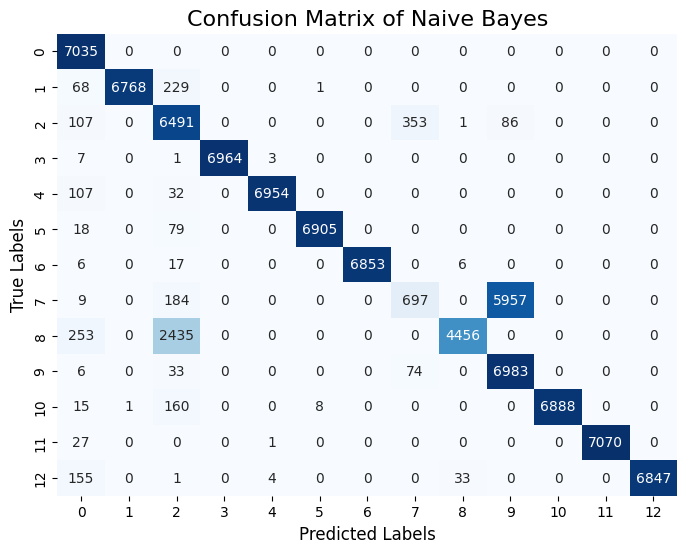

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Measure training time
start_train_time = time.time()
nb_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(nb_classifier, 'nb_model.pkl')
model_size = os.path.getsize('nb_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = nb_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Naive Bayes', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()
